In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import io

In [2]:
train_data=pd.read_csv('/home/dzhang/wudan/machine_learning/LSTM/data/train_data.csv')
test_data=pd.read_csv('/home/dzhang/wudan/machine_learning/LSTM/data/test_data.csv')

In [3]:
train_data.info()
train_data.describe()

buffer = io.StringIO()
train_data.info(buf=buffer)
info_str = buffer.getvalue()

# 解析 info 字符串
lines = info_str.split("\n")
columns_info = []
for line in lines:
    if "non-null" in line:  # 筛选出字段信息
        parts = line.split()
        ax = parts[0]
        column = parts[1]
        non_null = parts[2]
        cnt = parts[3]
        dtype = parts[4]
        columns_info.append([ax, column, non_null, cnt, dtype])

# 创建 DataFrame
info_df = pd.DataFrame(columns_info, columns=["#","Column", "Non-Null", "Count", "Dtype"])

# 保存为表格文件
info_df.to_excel("train_data_info.xlsx", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15216 entries, 0 to 15215
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15216 non-null  int64  
 1   dteday      15216 non-null  object 
 2   season      15216 non-null  int64  
 3   yr          15216 non-null  int64  
 4   mnth        15216 non-null  int64  
 5   hr          15216 non-null  int64  
 6   holiday     15216 non-null  int64  
 7   weekday     15216 non-null  int64  
 8   workingday  15216 non-null  int64  
 9   weathersit  15216 non-null  int64  
 10  temp        15216 non-null  float64
 11  atemp       15216 non-null  float64
 12  hum         15216 non-null  float64
 13  windspeed   15216 non-null  float64
 14  casual      15216 non-null  int64  
 15  registered  15216 non-null  int64  
 16  cnt         15216 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.0+ MB


In [4]:
test_data.info()
test_data.describe()

buffer = io.StringIO()
test_data.info(buf=buffer)
info_str = buffer.getvalue()

# 解析 info 字符串
lines = info_str.split("\n")
columns_info = []
for line in lines:
    if "non-null" in line:  # 筛选出字段信息
        parts = line.split()
        ax = parts[0]
        column = parts[1]
        non_null = parts[2]
        cnt = parts[3]
        dtype = parts[4]
        columns_info.append([ax, column, non_null, cnt, dtype])

# 创建 DataFrame
info_df = pd.DataFrame(columns_info, columns=["#","Column", "Non-Null", "Count", "Dtype"])

# 保存为表格文件
info_df.to_excel("test_data_info.xlsx", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     2160 non-null   int64  
 1   dteday      2160 non-null   object 
 2   season      2160 non-null   int64  
 3   yr          2160 non-null   int64  
 4   mnth        2160 non-null   int64  
 5   hr          2160 non-null   int64  
 6   holiday     2160 non-null   int64  
 7   weekday     2160 non-null   int64  
 8   workingday  2160 non-null   int64  
 9   weathersit  2160 non-null   int64  
 10  temp        2160 non-null   float64
 11  atemp       2160 non-null   float64
 12  hum         2160 non-null   float64
 13  windspeed   2160 non-null   float64
 14  casual      2160 non-null   int64  
 15  registered  2160 non-null   int64  
 16  cnt         2160 non-null   int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 287.0+ KB


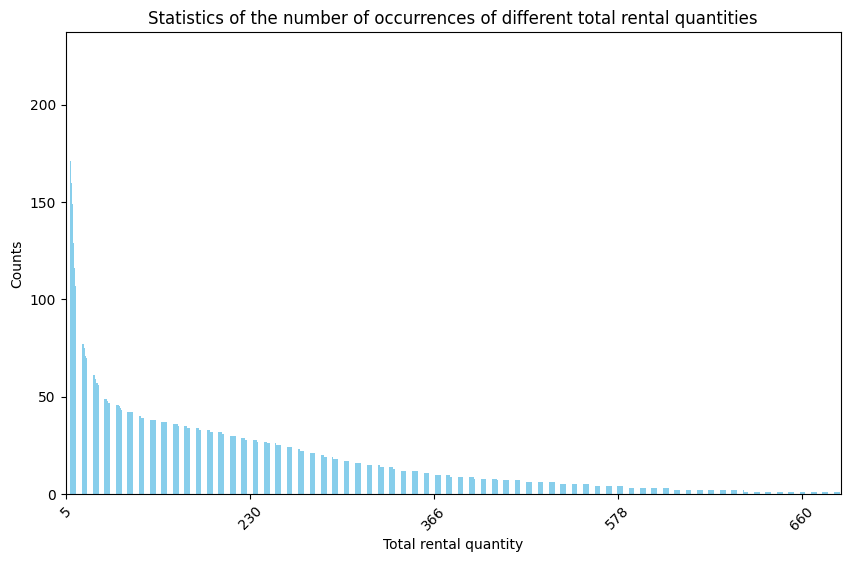

In [5]:
import matplotlib.pyplot as plt

value_counts = train_data['cnt'].value_counts()

# 设置图形大小
plt.figure(figsize=(10, 6))

# 绘制柱状图
value_counts.plot(kind='bar', color='skyblue')
step = 200  # 每隔 200 个值显示一个标签
plt.xticks(np.arange(0, len(value_counts), step), value_counts.index[::step], rotation=45)

# 添加标题和标签
plt.title('Statistics of the number of occurrences of different total rental quantities')
plt.xlabel('Total rental quantity')
plt.ylabel('Counts')

# 显示图形
plt.show()

In [6]:
import seaborn as sns
sns.set(style='whitegrid' , palette='tab10')

In [7]:
train_data1=train_data[np.abs(train_data['cnt']-train_data['cnt'].mean())<3*train_data['cnt'].std()]
train_data1.describe().round(2)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00
mean,7523.99,2.33,0.42,5.89,11.48,0.03,3.00,0.68,1.42,0.51,0.49,0.63,0.19,35.27,140.77,176.04
std,4365.34,1.03,0.49,3.20,6.93,0.16,2.01,0.47,0.64,0.20,0.17,0.20,0.12,48.71,131.12,162.17
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,3749.75,1.00,0.00,3.00,6.00,0.00,1.00,0.00,1.00,0.34,0.33,0.47,0.10,4.00,32.00,38.00
50%,7498.50,2.00,0.00,6.00,11.00,0.00,3.00,1.00,1.00,0.52,0.50,0.63,0.19,16.00,110.00,135.00
75%,11273.25,3.00,1.00,8.00,17.00,0.00,5.00,1.00,2.00,0.66,0.62,0.79,0.25,48.00,207.00,267.00
max,15216.00,4.00,1.00,12.00,23.00,1.00,6.00,1.00,4.00,1.00,1.00,1.00,0.85,367.00,680.00,717.00


In [8]:
describe_df = train_data1.describe().round(2)
describe_df.to_excel("train_data1_describe.xlsx", index=True)

[Text(0.5, 0, 'registered'), Text(0.5, 1.0, 'Distribution of count')]

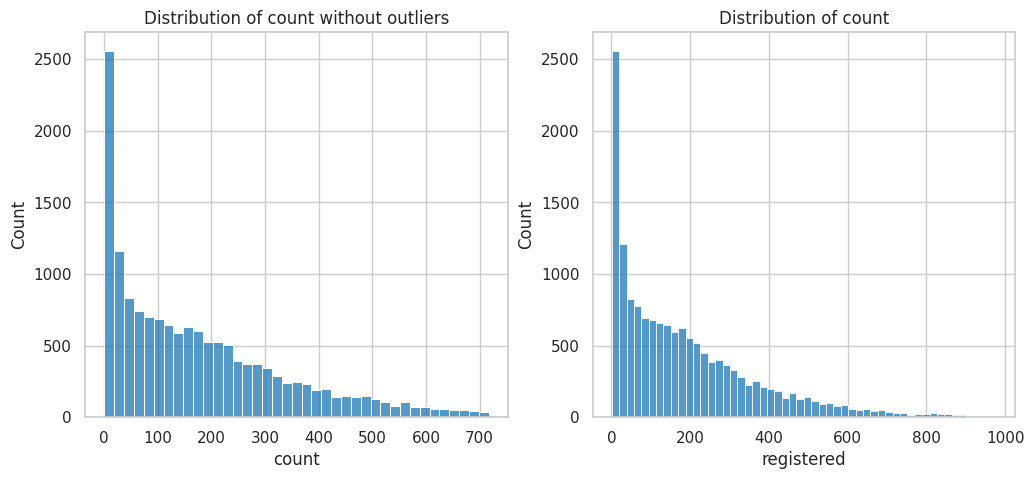

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
fig.set_size_inches(12,5)

sns.histplot(train_data1['cnt'],ax=ax1)
sns.histplot(train_data['cnt'],ax=ax2)

ax1.set(xlabel='count',title='Distribution of count without outliers',)
ax2.set(xlabel='registered',title='Distribution of count')

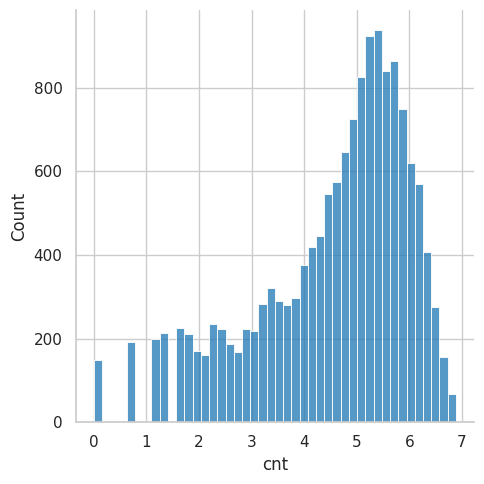

In [ ]:
ylabel=train_data['cnt']
y_logs=np.log(ylabel)
sns.displot(y_logs)

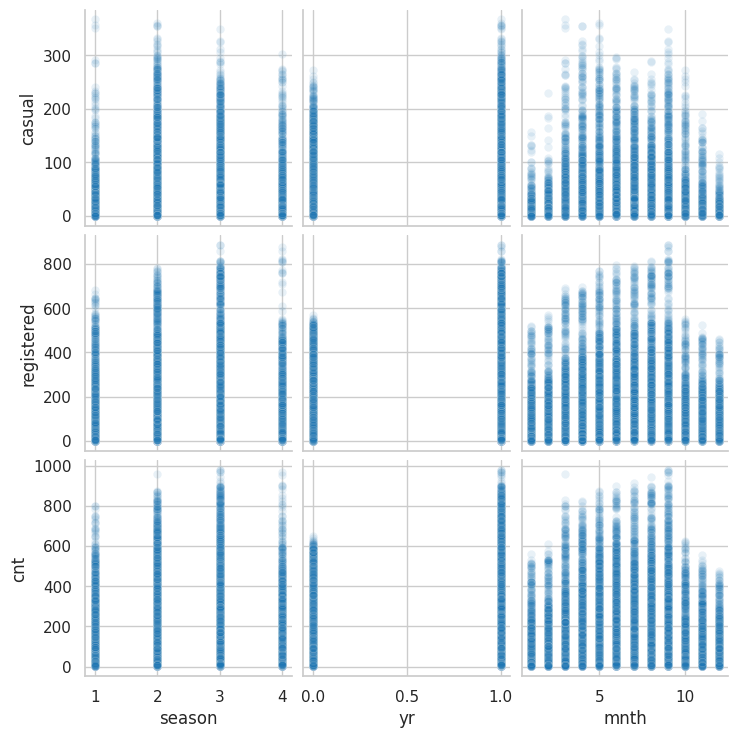

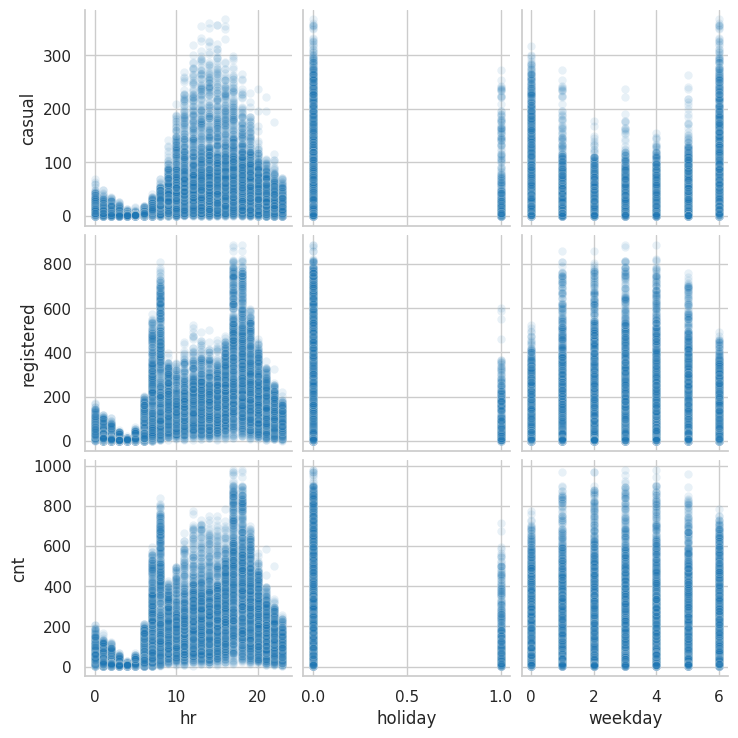

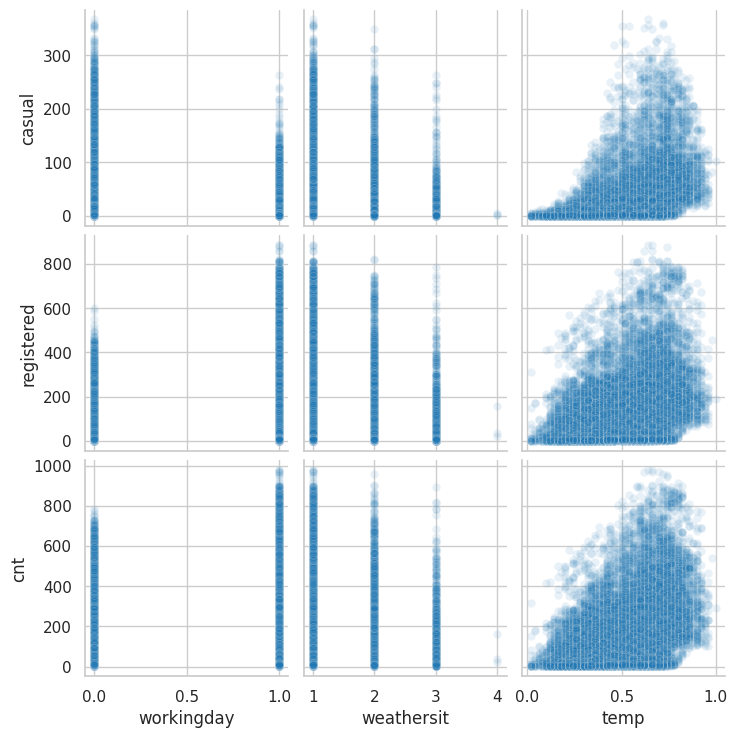

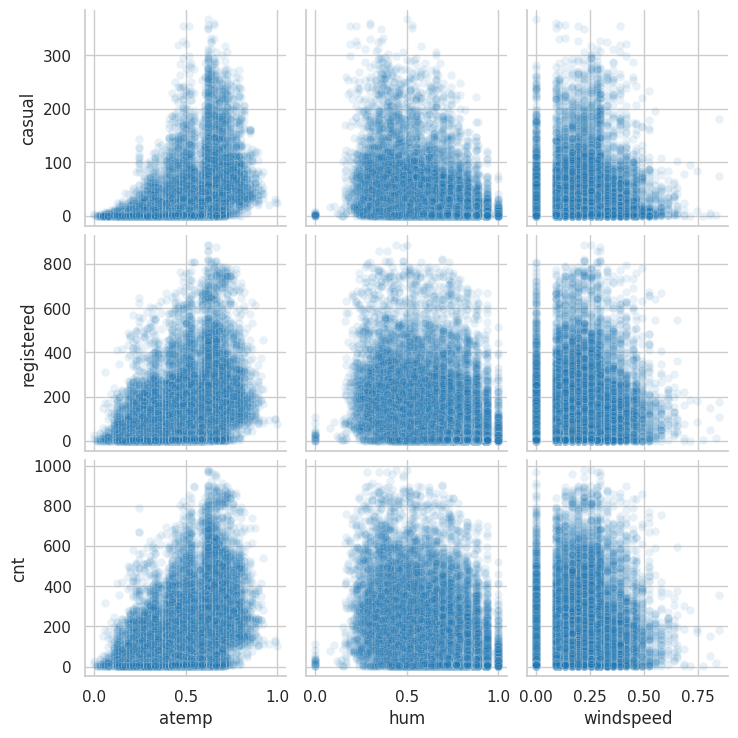

In [11]:
sns.pairplot(train_data ,x_vars=['season','yr','mnth'] , y_vars=['casual','registered','cnt'] , plot_kws={'alpha': 0.1})
sns.pairplot(train_data ,x_vars=['hr','holiday','weekday'] , y_vars=['casual','registered','cnt'] , plot_kws={'alpha': 0.1})
sns.pairplot(train_data ,x_vars=['workingday','weathersit','temp'] , y_vars=['casual','registered','cnt'] , plot_kws={'alpha': 0.1})
sns.pairplot(train_data ,x_vars=['atemp','hum','windspeed'] , y_vars=['casual','registered','cnt'] , plot_kws={'alpha': 0.1})
# train_data.info()

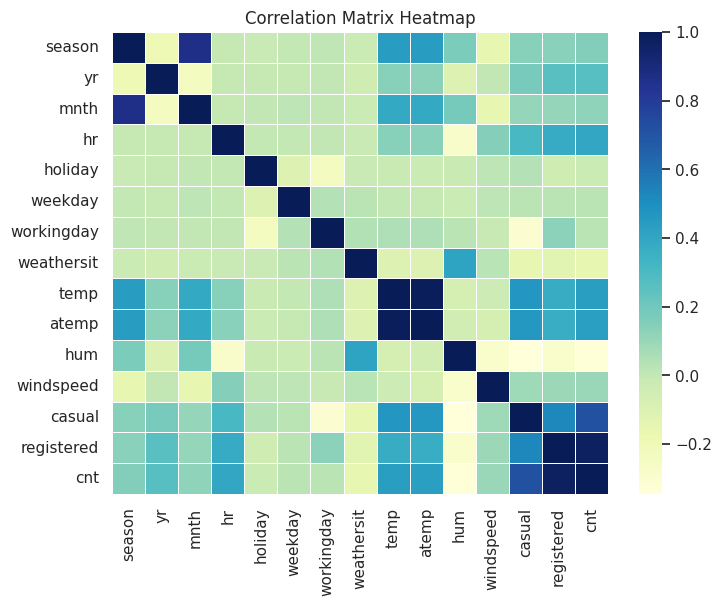

In [24]:
#相关性矩阵
corrDf = train_data[train_data.columns[2:]].corr() 

#ascending=False表示按降序排列
corrDf['cnt'].sort_values(ascending =False)
plt.figure(figsize=(8, 6))  # 设置图形大小
sns.heatmap(corrDf, annot=False, fmt=".2f", cmap="YlGnBu", linewidths=0.5)

# 设置标题
plt.title("Correlation Matrix Heatmap")
plt.show()